In [ ]:
import os
import time
import ZMQ_Stream
import sbxreader
import numpy as np
import matplotlib.pylab as plt
import zmq
from datetime import datetime as dt
def monitor_directory(directory):
    # Get initial set of files in the directory
    initial_files = set(os.listdir(directory))

    print("Monitoring new files in directory:", directory)
    try:
        while True:
            # Get the current set of files in the directory
            current_files = set(os.listdir(directory))

            # Find the difference between the current and initial set of files
            new_files = current_files - initial_files
            if new_files:
                for file in new_files:
                    print(f"New file created: {file}")
                    send_file_zmq(file)
                # Update the initial file set to the current files
                initial_files = current_files

            # Sleep for a while before checking again
            # time.sleep(1)
    except KeyboardInterrupt:
        print("Monitoring stopped.")




In [11]:
import os
import time
# import ZMQ_Stream
import sbxreader
import numpy as np
import matplotlib.pylab as plt
import zmq
from datetime import datetime as dt

def send_file_zmq(ss, _socket):
    _socket.send_pyobj(dict({
        "type": 'b_img_data',
        "data": ss,
        "timestamp": str(dt.now())
    }))

In [2]:
s = sbxreader.sbx_memmap("F:\AC28\AC28_241003_001\AC28_241003_001.sbx")  # read
ss = np.array(s)  # change to numpy 
ss = np.squeeze(ss)

In [ ]:
# Don't run it again
context = zmq.Context()
_socket = context.socket(zmq.PUB)  # publishing

send_IP = "*"
send_port = "5009"
_socket.bind('tcp://' + send_IP+":" +send_port)  # connecting

<SocketContext(bind='tcp://*:5009')>

In [16]:
for i in range(100):
    send_file_zmq(ss[i], _socket)

In [ ]:
# if __name__ == "__main__":
#     # Monitor the current directory
current_directory = os.getcwd()
monitor_directory(current_directory)

In [2]:
import sbxreader

# sbxreader.sbx_get_metadata("F:\AC28\AC28_241003_001\AC28_241003_001.sbx")
s = sbxreader.sbx_memmap("F:\AC28\AC28_241003_001\AC28_241003_001.sbx")

In [15]:
# ss = s.to_numpy()

In [5]:
import numpy as np
ss = np.array(s)

In [8]:
ss = np.squeeze(ss)
ss.shape

(25000, 512, 796)

In [7]:
import matplotlib.pylab as plt

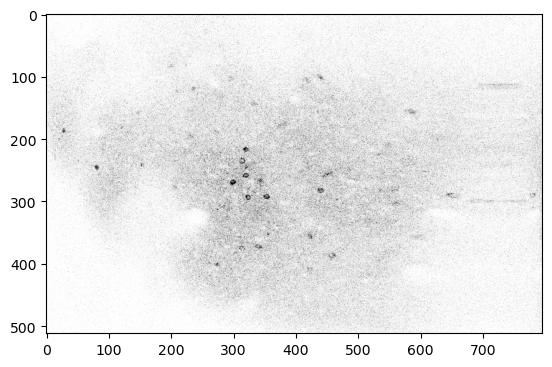

In [14]:
plt.imshow(ss[5000], cmap='gray')